# 一、实验名称机器学习-线性回归在银行贷款金额分析中的应用
# 二、实验目的
- 熟悉和掌握线性回归模型的基本原理及其在实际场景中的应用，理解回归分析如何通过特征与目标变量之间的关系进行预测。
- 使用基于线性回归模型实现的预测程序，对给定数据进行贷款金额预测分析。
- 分析不同模型参数（如特征选择、正则化参数等）对预测结果的影响，并能够根据具体数据调整模型参数，以获得更好的预测效果。


# 三、实验环境软件：
- Jupyter Notebook, Python 3.x, Pandas, Matplotlib, Scikit-learn
# 四、实验内容与要求
## 实验一：数据准备与探索性分析
- 实验内容：加载并观察实验数据，通过绘制散点图，直观地探索“工资”、“年龄”这两个特征与“银行贷款金额”之间的关系。
- 实验要求：请在下方代码单元格的 TODO 部分填入正确的代码，以完成数据加载和可视化。

### 1 导入 相关库加载数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 设置matplotlib以正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 创建DataFrame
data = {
    '工资': [5000, 7000, 10000, 12000, 15000, 20000, 25000, 30000, 40000, 50000],
    '年龄': [25, 28, 30, 32, 35, 40, 45, 50, 55, 60],
    '银行贷款金额': [20000, 25000, 30000, 35000, 40000, 50000, 55000, 60000, 70000, 80000]
}
df_loan = pd.DataFrame(data)
print("数据加载成功，预览：")
print(df_loan.head())

数据加载成功，预览：
      工资  年龄  银行贷款金额
0   5000  25   20000
1   7000  28   25000
2  10000  30   30000
3  12000  32   35000
4  15000  35   40000


### 2. 绘制“工资”与“银行贷款金额”的散点图

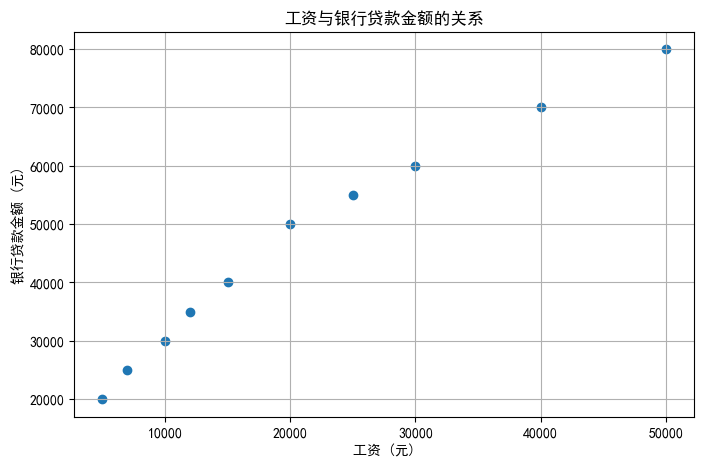

In [ ]:
plt.figure(figsize=(8, 5))
# TODO: 完成散点图绘制，x轴为'工资'，y轴为'银行贷款金额'
plt.scatter(x=df_loan['工资'], y=df_loan['银行贷款金额'])
plt.title('工资与银行贷款金额的关系')
plt.xlabel('工资 (元)')
plt.ylabel('银行贷款金额 (元)')
plt.grid(True)
plt.show()


### 3. 绘制“年龄”与“银行贷款金额”的散点图

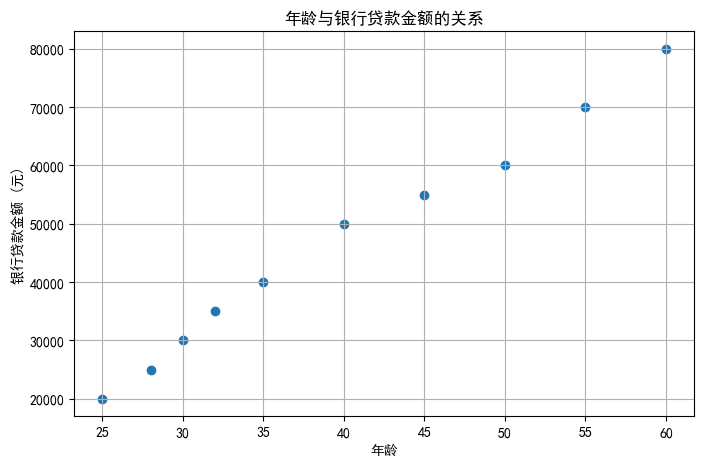

In [31]:
plt.figure(figsize=(8, 5))
# TODO: 完成散点图绘制，x轴为'年龄'，y轴为'银行贷款金额'
plt.scatter(x=df_loan['年龄'], y=df_loan['银行贷款金额'])
plt.title('年龄与银行贷款金额的关系')
plt.xlabel('年龄')
plt.ylabel('银行贷款金额 (元)')
plt.grid(True)
plt.show()

- 思考题：观察你绘制的两张散点图，你认为哪个特征（工资/年龄）和贷款金额的关系更“像”一条直线？为什么？（请在此处填写你的答案）

## 实验二：单特征线性回归模型


- 实验内容：分别只使用“工资”和“年龄”作为特征，构建、训练并评估两个独立的简单线性回归模型，比较它们的性能。
- 实验要求：请在下方代码单元格的 TODO 部分填入正确的代码，以完成模型的训练与评估。
### 任务2.1: 基于“工资”的模型 

In [34]:
print("--- 基于'工资'的单特征模型 ---")
# 1. 准备特征X和目标y
# TODO: 选取'工资'作为特征X_salary，'银行贷款金额'作为目标y_salary
# 注意：特征X必须是二维的DataFrame，所以要用两个中括号
X_salary = df_loan[['工资']]
y_salary = df_loan['银行贷款金额']

# 2. 创建并训练模型
# TODO: 创建一个LinearRegression模型实例，并用X_salary和y_salary进行训练
model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)

# 3. 查看模型参数并进行预测
w_salary = model_salary.coef_[0]
b_salary = model_salary.intercept_
print(f"模型权重 w: {w_salary:.2f}, 模型偏置 b: {b_salary:.2f}")
y_pred_salary = model_salary.predict(X_salary)

# 4. 评估模型
# TODO: 使用mean_squared_error和r2_score函数计算MSE和R²
mse_salary = mean_squared_error(y_salary, y_pred_salary)
r2_salary = r2_score(y_salary, y_pred_salary)
print(f"均方误差 (MSE): {mse_salary:.2f}")
print(f"决定系数 (R²): {r2_salary:.2f}\n")

--- 基于'工资'的单特征模型 ---
模型权重 w: 1.32, 模型偏置 b: 18313.22
均方误差 (MSE): 10291188.90
决定系数 (R²): 0.97



###  任务2.2: 基于“年龄”的模型

In [36]:
print("--- 基于'年龄'的单特征模型 ---")
# 1. 准备特征X和目标y
# TODO: 选取'年龄'作为特征X_age，'银行贷款金额'作为目标y_age
X_age = df_loan[['年龄']]
y_age = df_loan['银行贷款金额']

# 2. 创建并训练模型
# TODO: 创建并训练基于年龄的线性回归模型
model_age = LinearRegression()
model_age.fit(X_age, y_age)

# 3. 查看模型参数并进行预测
w_age = model_age.coef_[0]
b_age = model_age.intercept_
print(f"模型权重 w: {w_age:.2f}, 模型偏置 b: {b_age:.2f}")
y_pred_age = model_age.predict(X_age)

# 4. 评估模型
# TODO: 计算基于年龄的模型的MSE和R²
mse_age = mean_squared_error(y_age, y_pred_age)
r2_age = r2_score(y_age, y_pred_age)
print(f"均方误差 (MSE): {mse_age:.2f}")
print(f"决定系数 (R²): {r2_age:.2f}")

--- 基于'年龄'的单特征模型 ---
模型权重 w: 1639.91, 模型偏置 b: -19096.33
均方误差 (MSE): 3489678.90
决定系数 (R²): 0.99


- 思考题：对比两个模型的R²分数，哪个特征对贷款金额的预测能力更强？这和你从散点图得到的直观感受一致吗？（请在此处填写你的答案）
  





### 实验三：多特征线性回归模型与特征缩放
- 实验内容：构建一个同时使用“工资”和“年龄”两个特征的模型，并探索特征缩放（标准化）对模型权重的影响。
- 实验要求：请在下方代码单元格的 TODO 部分填入正确的代码，以完成多特征模型的构建和数据预处理。

### 任务3.1: 不进行特征缩放的多特征模型 

In [ ]:
print("--- 多特征模型（无缩放） ---")
# 1. 准备特征X和目标y
# TODO: 同时选取'工资'和'年龄'作为特征X_multi
features = ['工资', '年龄']
X_multi = df_loan[features]
y_multi = df_loan['银行贷款金额']

# 2. 创建并训练模型
# TODO: 创建并训练多特征线性回归模型
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# 3. 查看模型参数并评估
print(f"模型权重 w: {model_multi.coef_}")
print(f"模型偏置 b: {model_multi.intercept_:.2f}")
y_pred_multi = model_multi.predict(X_multi)
r2_multi = r2_score(y_multi, y_pred_multi)
print(f"决定系数 (R²): {r2_multi:.2f}\n")

--- 多特征模型（无缩放） ---
模型权重 w: [7.70568746e-02 1.54594364e+03]
模型偏置 b: -16986.76
决定系数 (R²): 0.99



### 任务3.2: 进行特征缩放的多特征模型 

In [40]:
print("--- 多特征模型（有缩放） ---")
# 1. 初始化一个标准化工具
scaler = StandardScaler()

# 2. 对特征数据进行标准化
# TODO: 使用scaler对X_multi进行'fit'和'transform'操作
X_multi_scaled = scaler.fit_transform(X_multi)

# 3. 在标准化后的数据上训练新模型
# TODO: 创建一个新模型，并在X_multi_scaled上进行训练
model_multi_scaled = LinearRegression()
model_multi_scaled.fit(X_multi_scaled, y_multi)

# 4. 查看新模型参数并评估
print(f"模型权重 w (缩放后): {model_multi_scaled.coef_}")
print(f"模型偏置 b (缩放后): {model_multi_scaled.intercept_:.2f}")
y_pred_multi_scaled = model_multi_scaled.predict(X_multi_scaled)
r2_multi_scaled = r2_score(y_multi, y_pred_multi_scaled)
print(f"决定系数 (R²) (缩放后): {r2_multi_scaled:.2f}")


--- 多特征模型（有缩放） ---
模型权重 w (缩放后): [ 1086.58390357 17680.62161131]
模型偏置 b (缩放后): 46500.00
决定系数 (R²) (缩放后): 0.99


- 思考题：对比特征缩放前后，模型的两个权重值（对应工资和年龄）发生了什么变化？为什么缩放后的权重值更能公平地反映每个特征的重要性？为什么特征缩放前后的R²值几乎没有变化？（请在此处填写你的答案）

### 实验四：模型应用
- 实验内容：使用你训练出的最佳模型（经过特征缩放的多特征模型），对一个全新的员工作出贷款金额预测。
- 实验要求：请在下方代码单元格的 TODO 部分填入正确的代码，完成预测。

In [42]:
# 准备一个新员工的数据
new_employee = pd.DataFrame({
    '工资': [35000],
    '年龄': [48]
})

# 1. 对新数据进行标准化
# 重要：必须使用之前已经'fit'过的同一个scaler对象来进行'transform'
# TODO: 使用之前创建的scaler来转换new_employee
new_employee_scaled = scaler.transform(new_employee)

# 2. 使用缩放后的模型进行预测
# TODO: 使用model_multi_scaled进行预测
predicted_loan_amount = model_multi_scaled.predict(new_employee_scaled)

print(f"预测：对于一个工资为35000元、年龄48岁的员工，银行大约会批准 {predicted_loan_amount[0]:.2f} 元的贷款。")


预测：对于一个工资为35000元、年龄48岁的员工，银行大约会批准 59915.52 元的贷款。
